In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Random data generation for demonstration
np.random.seed(0)
n_samples = 100
experience = np.random.uniform(0, 10, n_samples)
salary = 50000 + 8000 * experience + np.random.normal(0, 5000, n_samples)

df = pd.DataFrame({
    'Experience Years': experience,
    'Salary': salary
})

x = df['Experience Years'].values
y = df['Salary'].values
m = len(y)
X_b = np.c_[np.ones((m, 1)), x]  # shape (m, 2)

tau = 1.0  # Bandwidth parameter for Locally Weighted Regression
alpha = 0.01 # Learning rate for gradient descent
n_iterations = 1000  # Number of iterations for gradient descent

x_grid = np.linspace(x.min(), x.max(), 500)  # Grid for predictions

y_grid = np.zeros_like(x_grid)

for i, x_i in enumerate(x_grid):
    weights = np.exp(-((x - x_i) ** 2) / (2 * tau**2))  # Gaussian weights

    theta = np.zeros(2)  # Initialize theta for each x_i

    for iteration in range(n_iterations):
        predictions = X_b.dot(theta)
        weighted_residuals = (predictions - y) * weights
        gradients = X_b.T.dot(weighted_residuals) / m
        theta = theta - alpha * gradients

    y_grid[i] = theta[0] + theta[1] * x_i  # Predict y for each x_i using the locally weighted theta






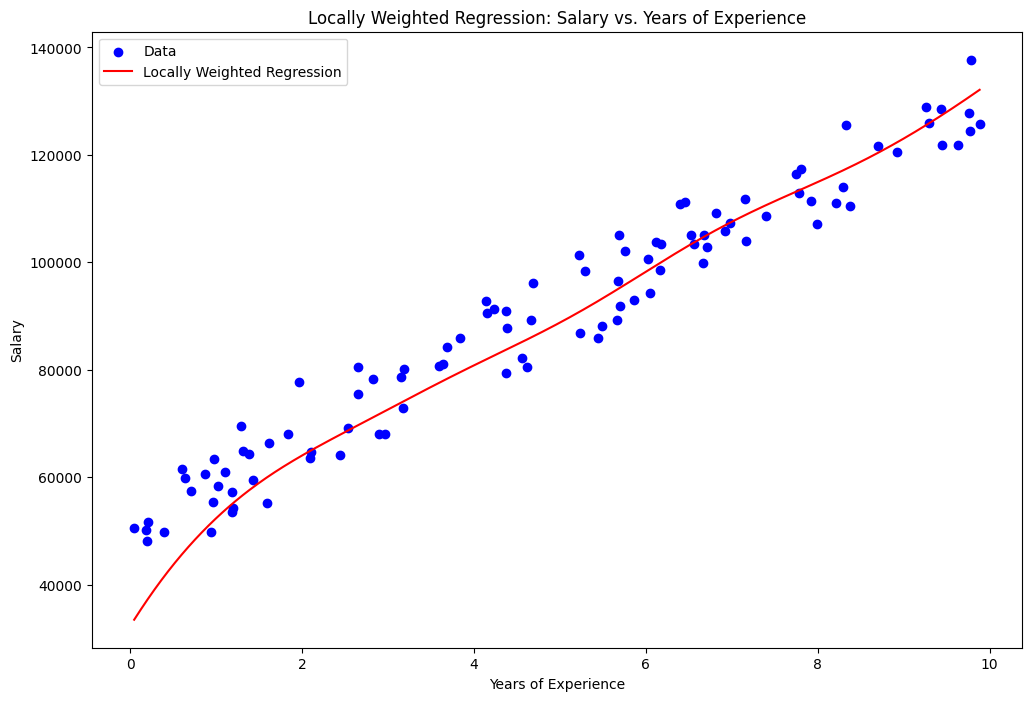

In [28]:
plt.figure(figsize=(12, 8))
plt.scatter(x, y, label='Data', color = 'blue')
plt.plot(x_grid, y_grid, label='Locally Weighted Regression', color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Locally Weighted Regression: Salary vs. Years of Experience')
plt.legend()
plt.show()

